In [126]:
from utils import *

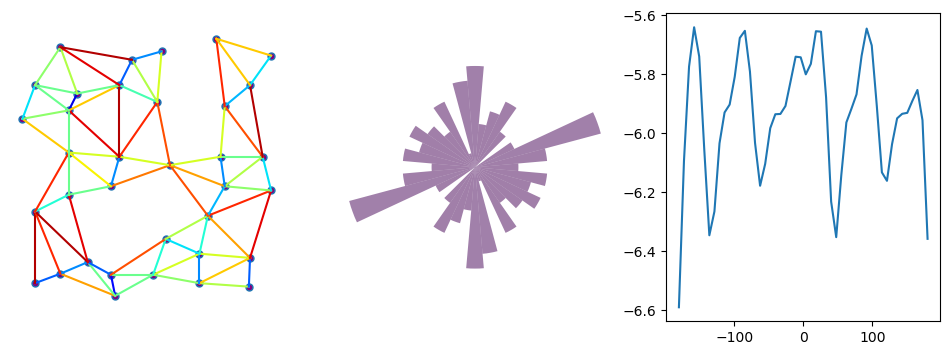

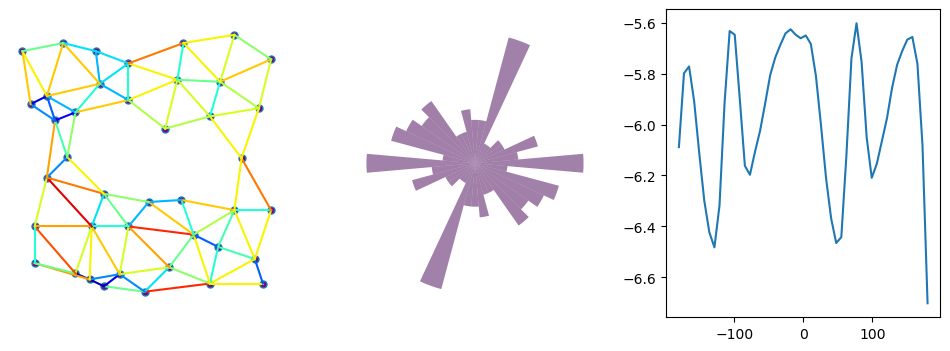

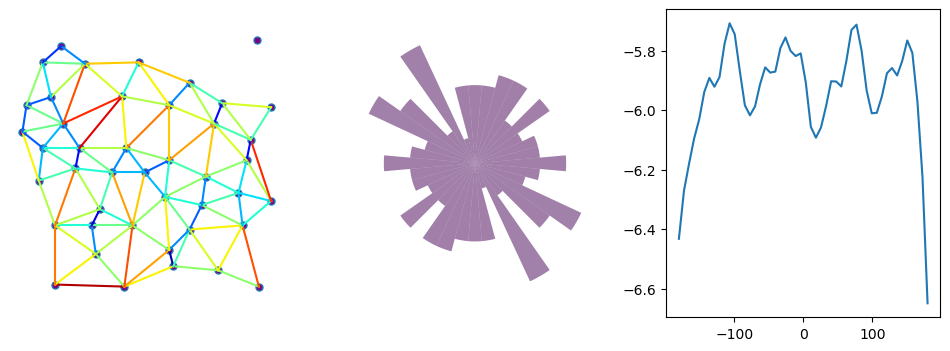

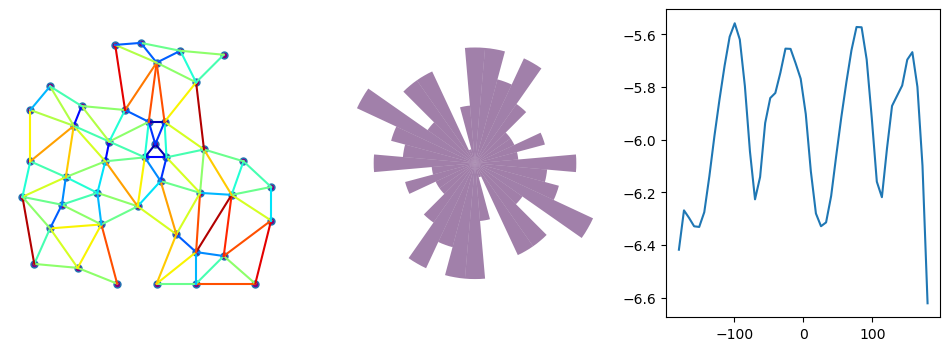

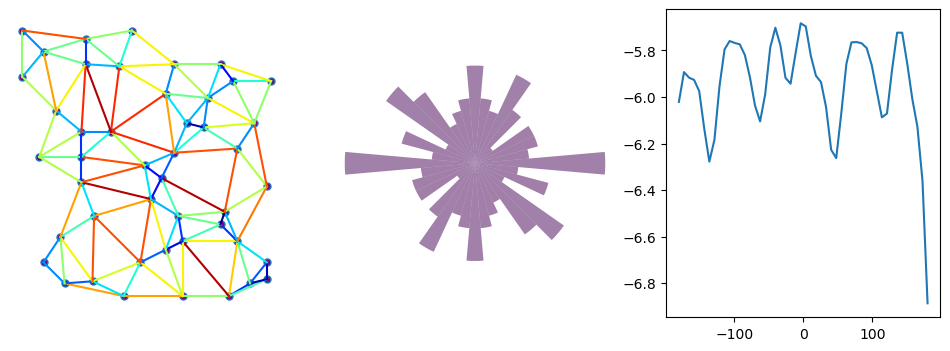

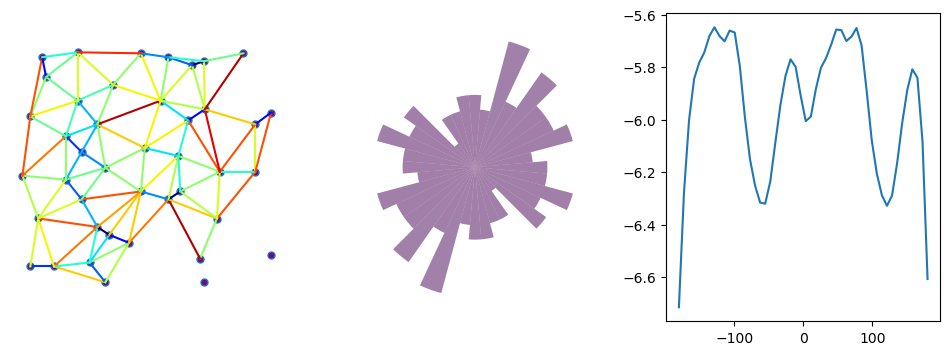

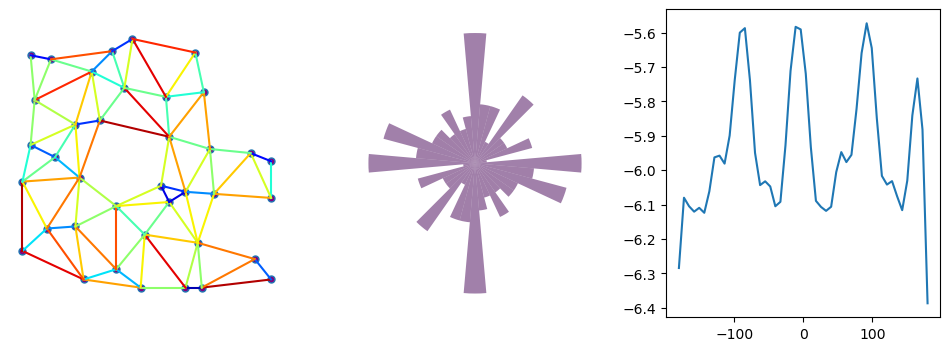

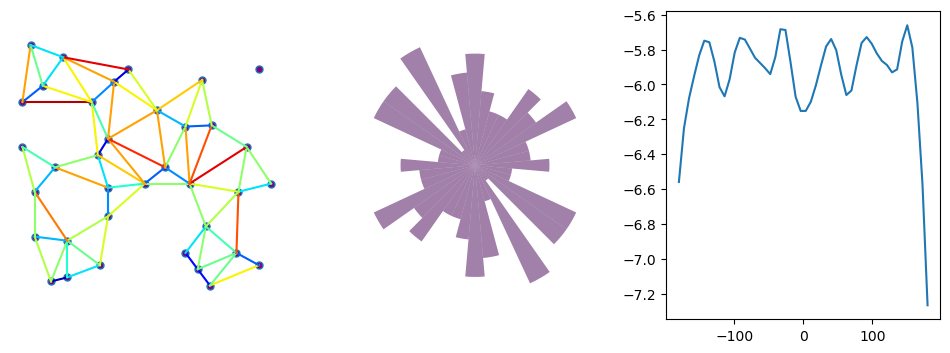

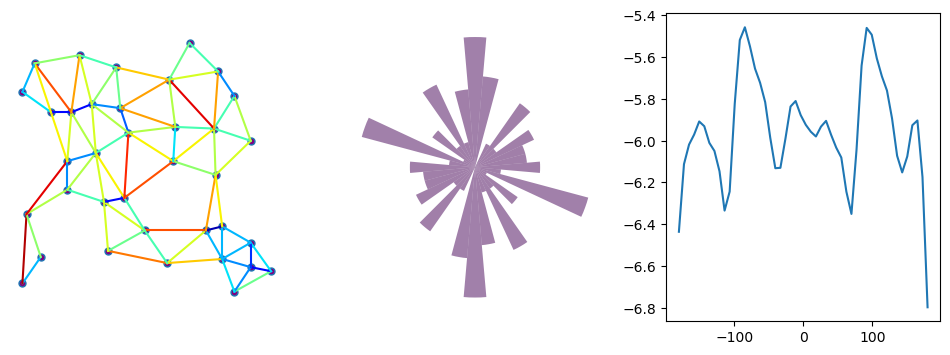

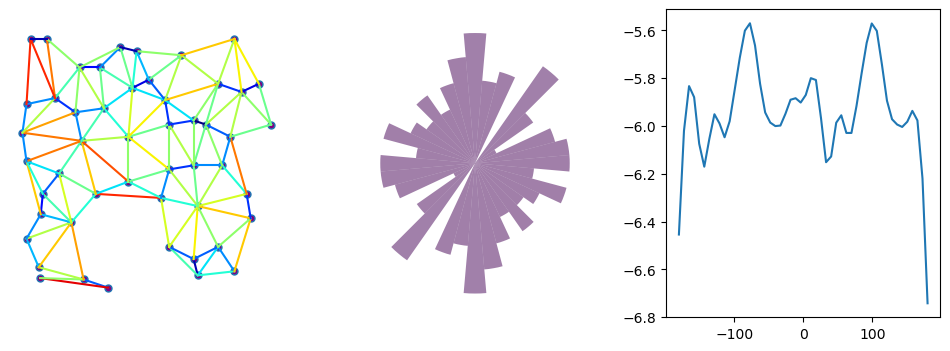

In [197]:
thre=[50,280]
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat)[0]
    links = generateLinks(np.array(vxs)*16, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure(figsize=[12,4])
    ax = plt.subplot(131)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(132,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)
    a = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
    s = np.linspace(-180,180)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    ax=plt.subplot(133)
    ax.plot(s, e)

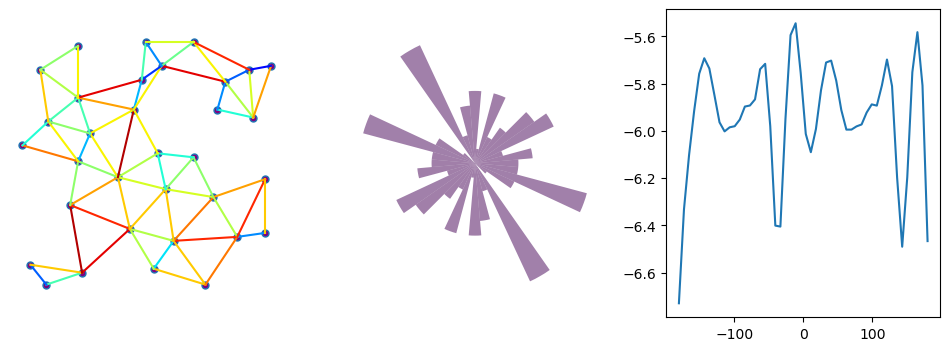

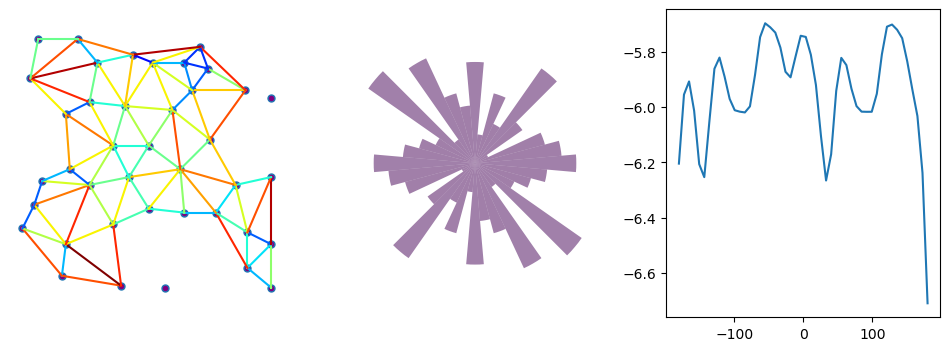

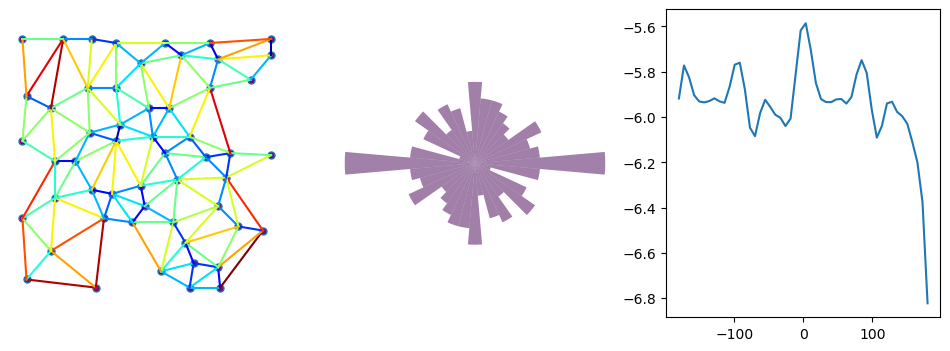

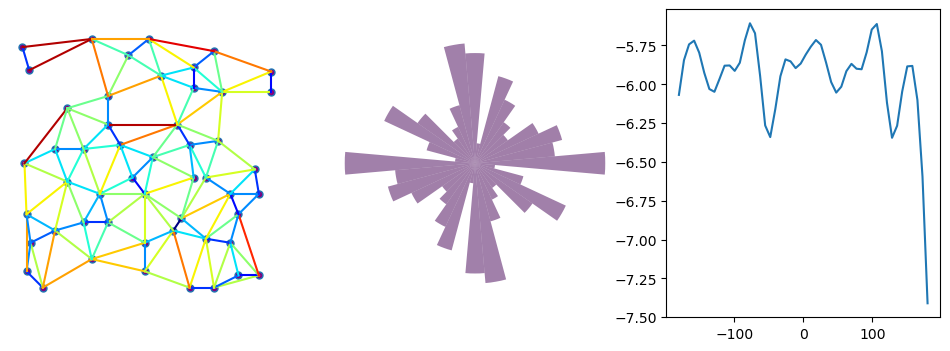

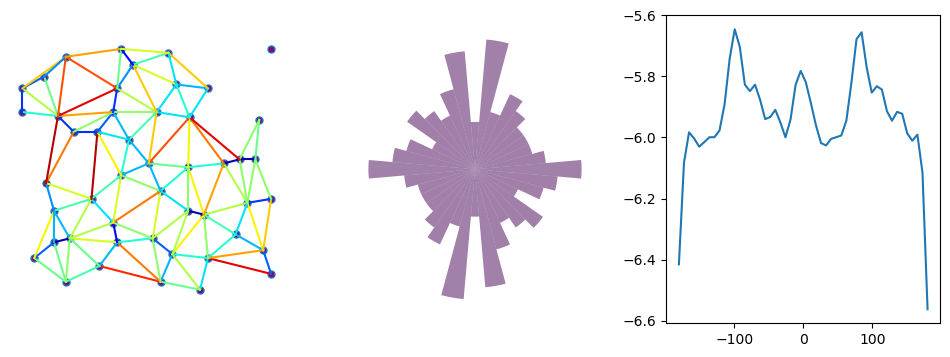

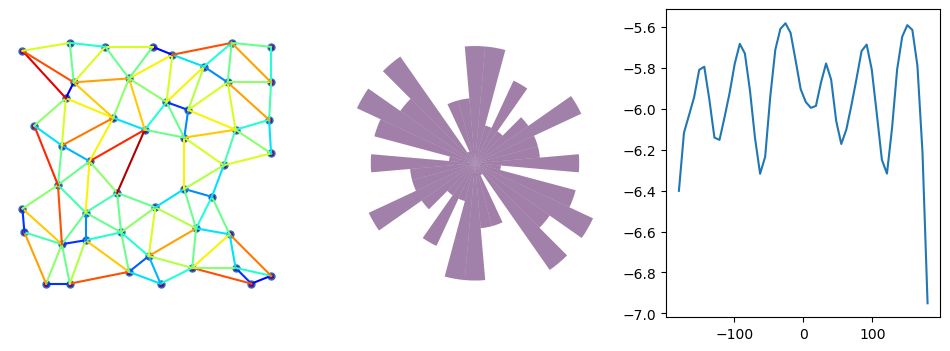

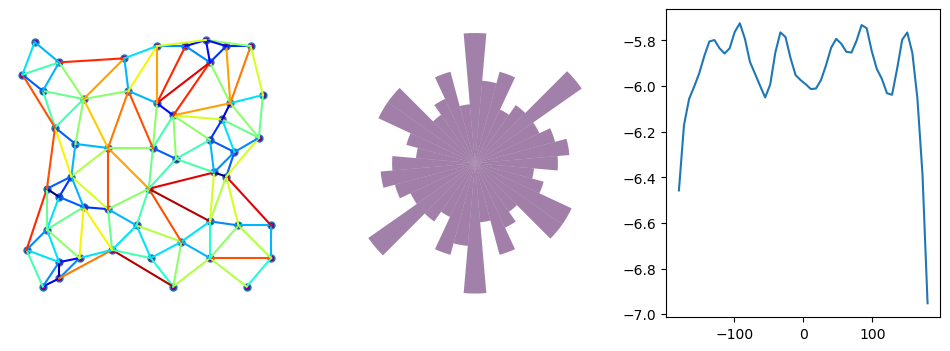

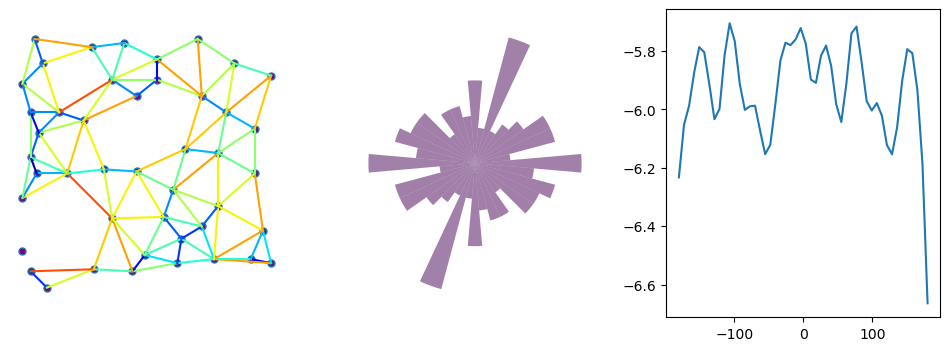

In [225]:
test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
for i in range(0):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat)[0]
    links = generateLinks(np.array(vxs)*16, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    for j in [5,10,15,20]:
        plt.figure(figsize=[12,4])
        ax = plt.subplot(131)
        ax.axis("off")
        visualize(vxs, links, p_size=16, thre=thre)
        ax = plt.subplot(132,projection="polar")
        ax.grid(False)
        ax.axis("off")
        plotAngleHist([x+180 for x in angles],ax=ax)
        a = np.array(angles).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=j).fit(a)
        s = np.linspace(-180,180)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        ax=plt.subplot(133)
        ax.plot(s, e)

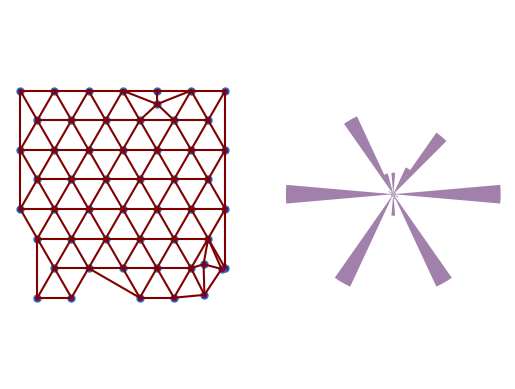

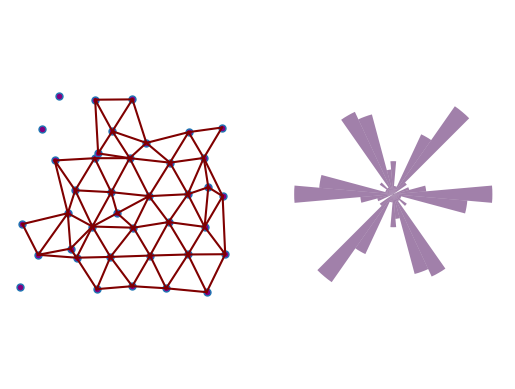

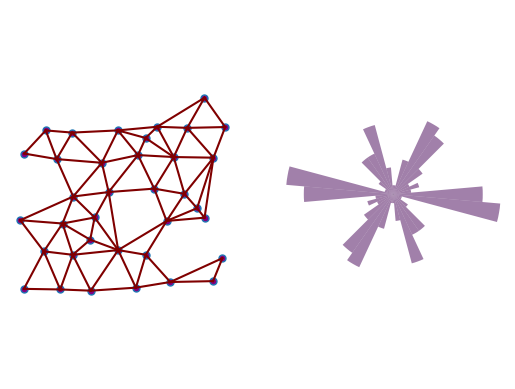

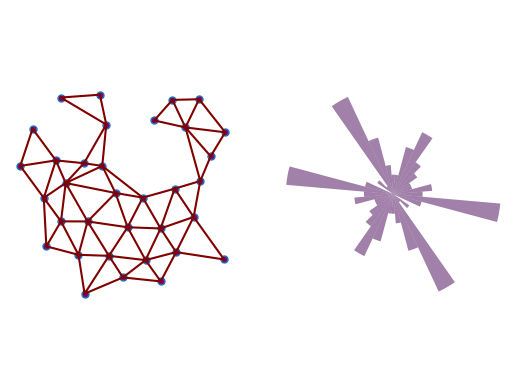

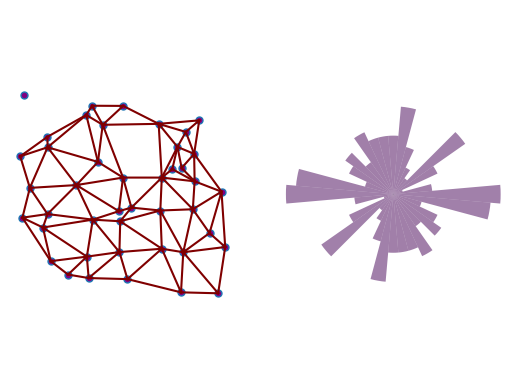

In [130]:
size = 16*64
for i in range(5):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=30*i, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    links = generateLinks(np.array(vxs), thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure()
    ax = plt.subplot(121)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(122,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)

In [132]:
# from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
# from pyclustering.utils.metric import type_metric, distance_metric

angle_dist = lambda a, b: (a[0]-b[0]+360)%360 if (a[0]-b[0]+360)%360 < 180 else 360-(a[0]-b[0]+360)%360
metric = distance_metric(type_metric.USER_DEFINED, func=angle_dist)

# create K-Means algorithm with specific distance metric
start_centers = [[np.random.rand()*360] for x in range(10)]
kmeans_instance = kmeans(pangles, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
centers = kmeans_instance.get_centers()

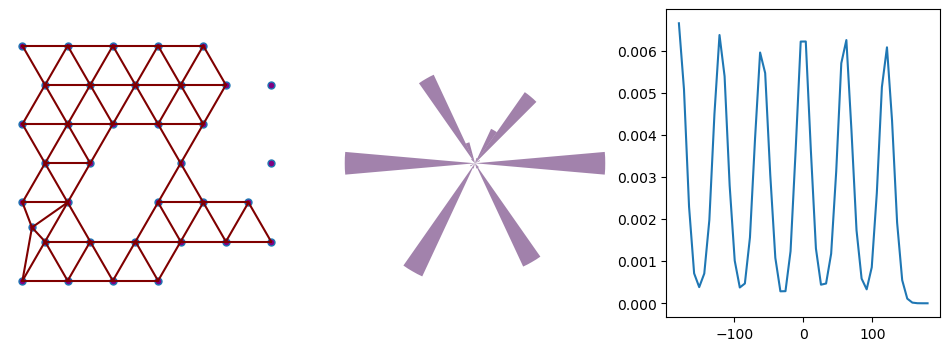

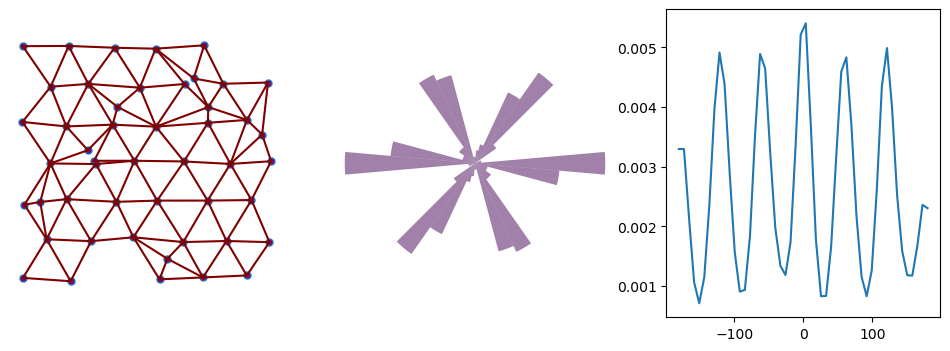

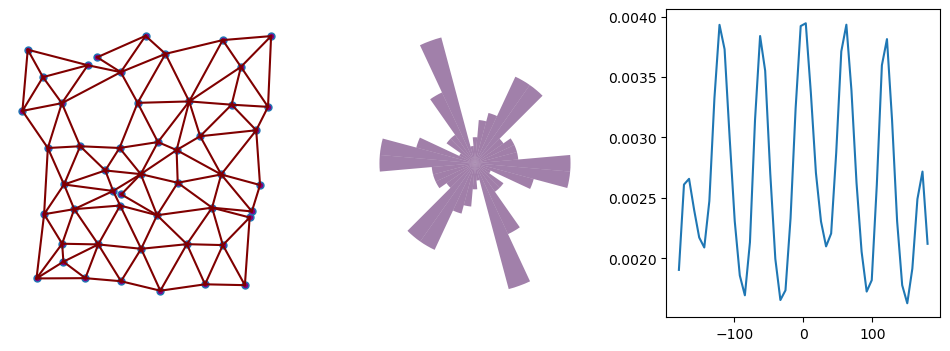

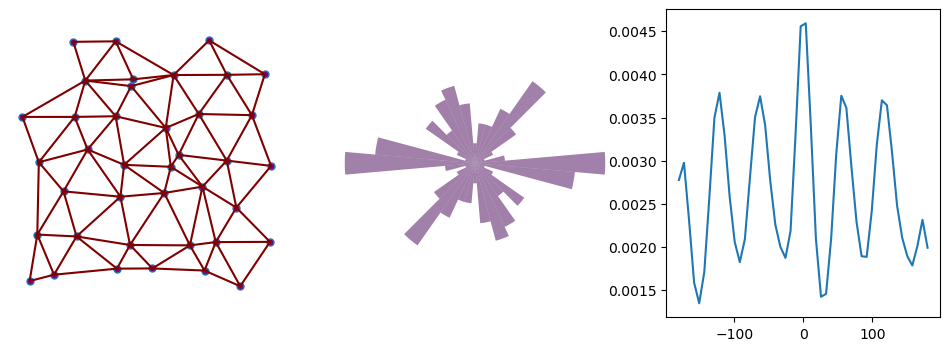

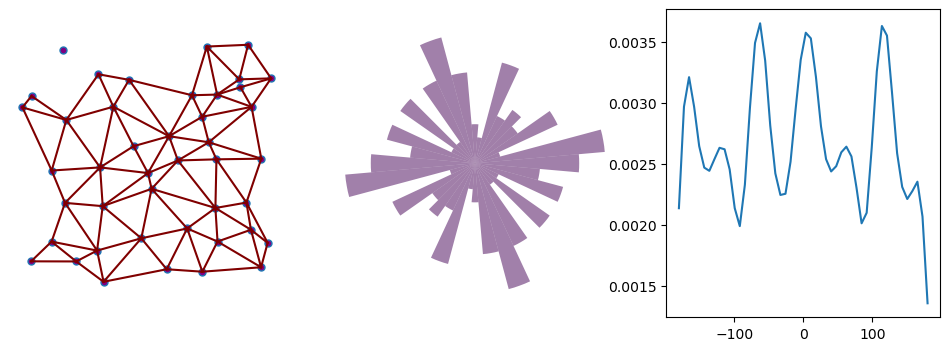

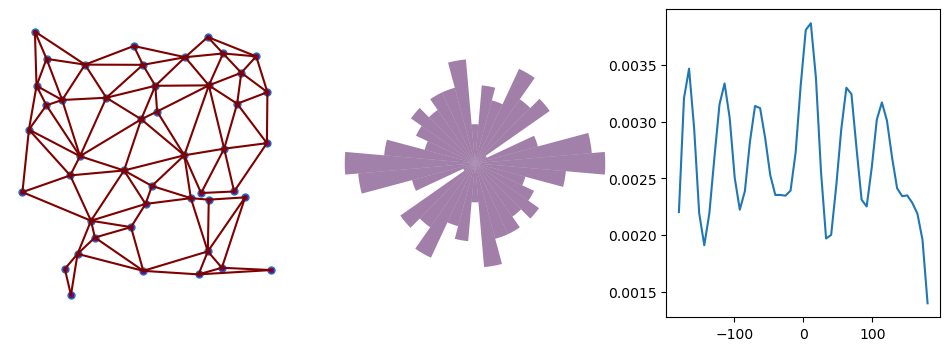

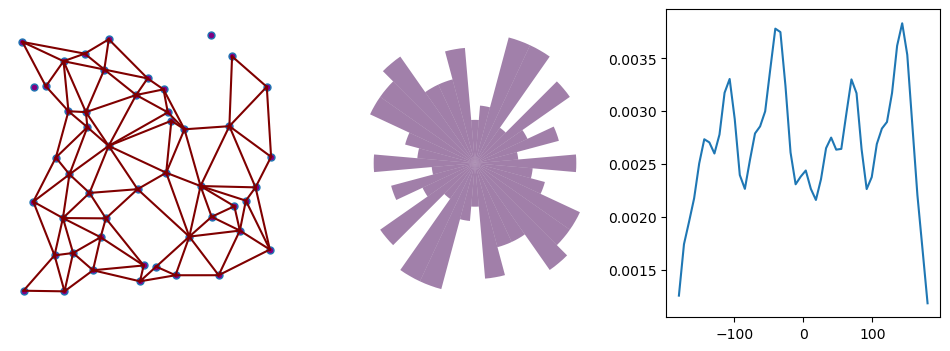

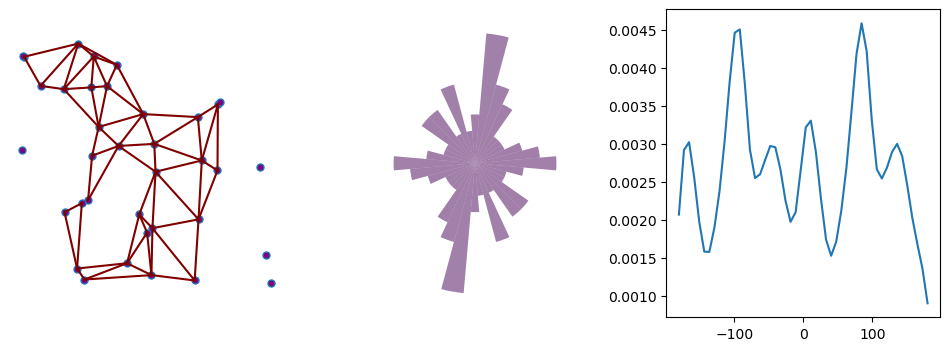

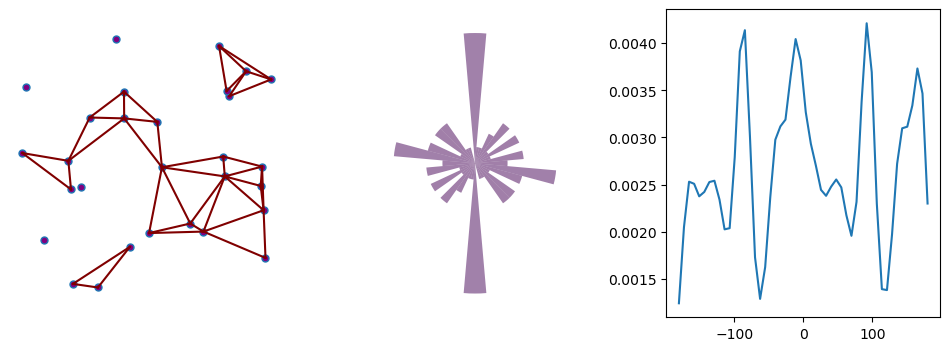

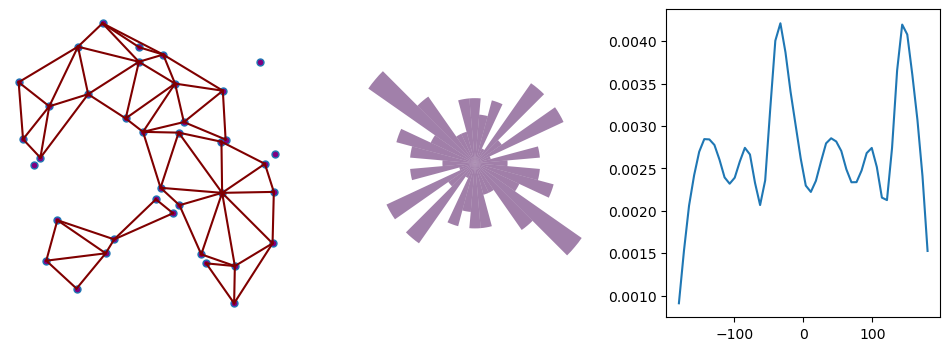

In [201]:
size = 16*64
for i in range(10):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=30*i, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    links = generateLinks(np.array(vxs), thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure(figsize=[12,4])
    ax = plt.subplot(131)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(132,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)
    a = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
    s = np.linspace(-180,180)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    ax=plt.subplot(133)
    ax.plot(s, e)
    #ax.vlines([ x[0] for x in centers], 0, 300, zorder=3)

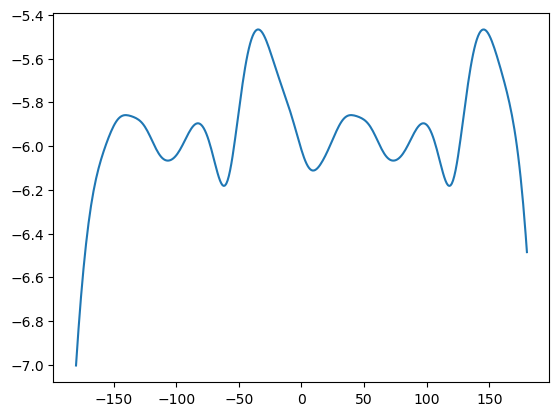

In [220]:
s = np.linspace(-180,180,361)
probs = kde.score_samples(s.reshape(-1,1))
#ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
plt.plot(s, e)
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]

In [227]:
peaks_idx = [ x for x in ma if x < ma[1]+180 ][1:]
n_peak = len(peaks_idx)
peaks_prob = [probs[x] for x in peaks_idx]
highest_peak = max([probs[x] for x in peaks])
peaks_angle = peaks_idx[np.argsort(peaks_prob)[-3:]]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
peaks_idx[np.array([0,2,1])]

TypeError: list indices must be integers or slices, not list

In [226]:
np.argsort(peaks_prob)[-3:]

array([0, 2, 1], dtype=int64)

In [ ]:
s = np.linspace(-180,180)
e = kde.score_samples(s.reshape(-1,1))
#ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
ax=plt.subplot(133)
ax.plot(s, e)

In [154]:
angle_dist = lambda a, b: (a-b+360)%360 if (a-b+360)%360 < 180 else 360-(a-b+360)%360
def kmeans(data, k, starts, max_iter=10):
    centers = [ 0 for x in range(k) ] 
    iters = 0
    while True:
        tmp = [[] for x in range(k)]
        for i in data:
            min_dist=360
            for j in range(k):
                if angle_dist(i,starts[j]) < min_dist:
                    min_dist=angle_dist(i,starts[j])
                    closest_center=j
            tmp[closest_center].append(min_dist)
        centers = [np.mean(x) for x in tmp]
        print(centers)
        if iters > max_iter:
            break
        if centers==starts:
            break
        iters+=1
        starts=centers
    return(centers)


In [162]:
bins=36
counts, bins = np.histogram(angles, bins=np.linspace(0, 360, bins + 1))

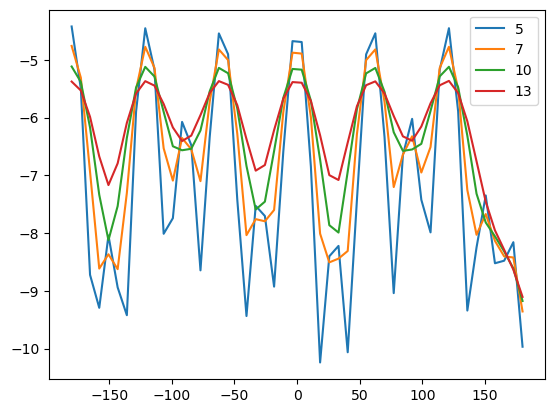

In [185]:
a = np.array(angles).reshape(-1, 1)
for b in [5,7,10,13]:
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(a)
    s = np.linspace(-180,180)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    plt.plot(s, e)
plt.legend([5,7,10,13])

In [155]:
#kmeans(pangles,6,[np.random.rand()*360 for x in range(6)])

[7.20392995380795, 11.527871602054429, nan, 35.265403813184435, 32.40641047540965, 38.683257201606835]
[68.95652679405991, nan, nan, nan, 2.4064104754097, 80.28748532830312]
[8.93971397244594, nan, nan, nan, 63.1442689339477, 65.10563693040966]
[69.5713398537963, nan, nan, nan, 3.1274561123337428, 80.28748532830306]
[9.554527032182333, nan, nan, nan, 63.853590251572065, 65.10563693040966]
[70.17615595321176, nan, nan, nan, 3.836777429958101, 80.28748532830306]
[10.15934313159779, nan, nan, nan, 64.55137788923513, 65.10563693040966]
[70.77113764450665, nan, nan, nan, 4.534565067621171, 80.28748532830306]
[10.754324822892697, nan, nan, nan, 65.23781938644832, 65.10563693040966]
[71.35644483675608, nan, nan, nan, 80.15530287226443, 5.088824108795703]
[11.339632015142126, nan, nan, nan, 65.2378193864483, 65.78306608549]
[71.93223483888767, nan, nan, nan, 5.221006564834351, 79.61005617322274]


c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[71.93223483888767, nan, nan, nan, 5.221006564834351, 79.61005617322274]

In [139]:
pangles = [ x+180 for x in angles]

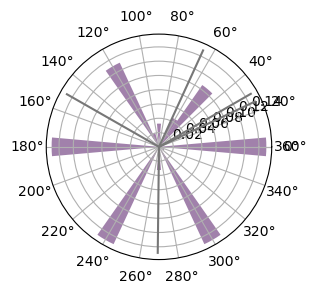

In [171]:
ax = plt.subplot(122,projection="polar")
#ax.grid(False)
#x.axis("off")
ax.vlines([ x[0]/180*np.pi for x in centers], 0, 0.15, colors="#777777", zorder=3)
plotAngleHist(pangles,ax=ax)


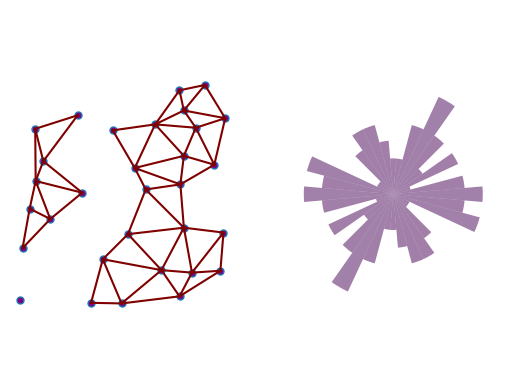

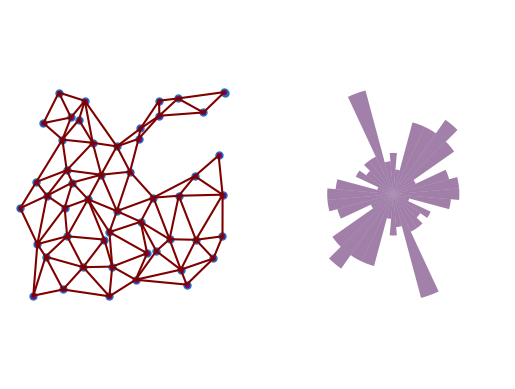

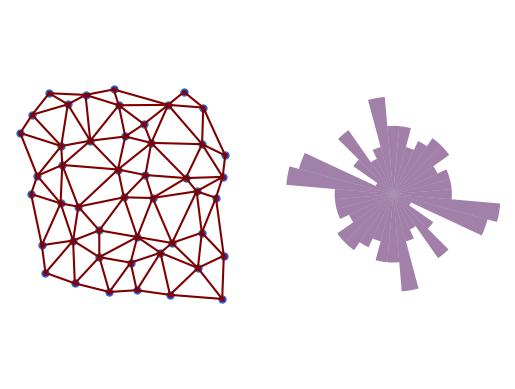

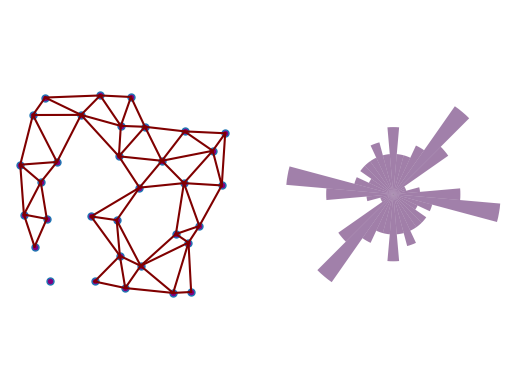

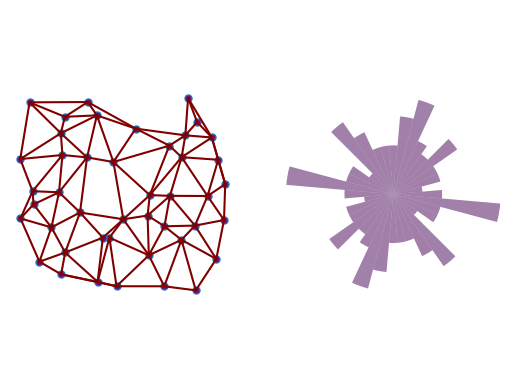

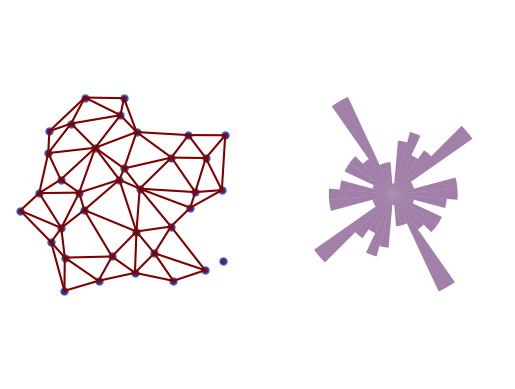

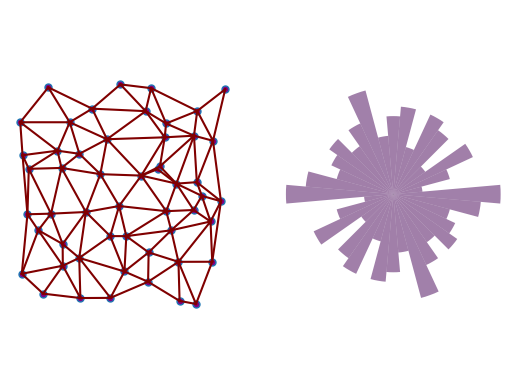

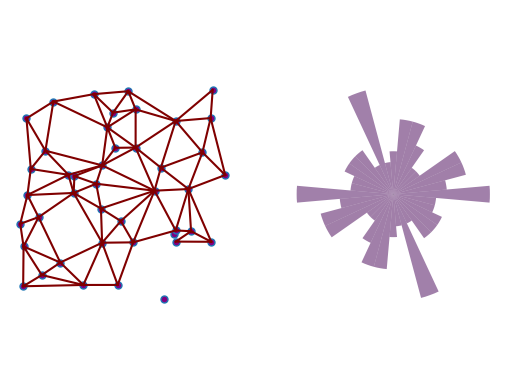

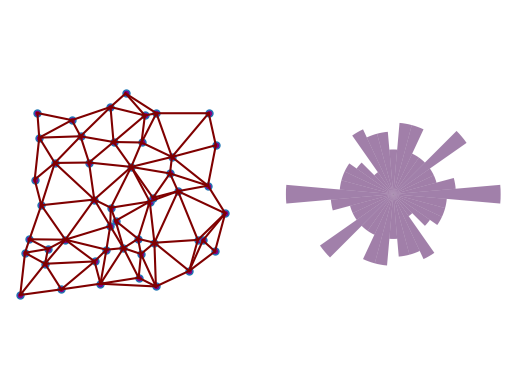

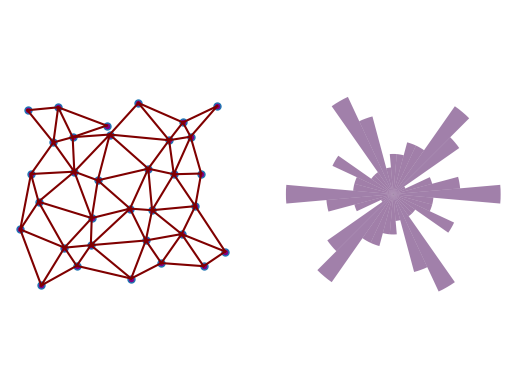

In [22]:
size = 16*64
for i in range(10):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=120, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    links = generateLinks(np.array(vxs), thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure()
    ax = plt.subplot(121)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(122,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)

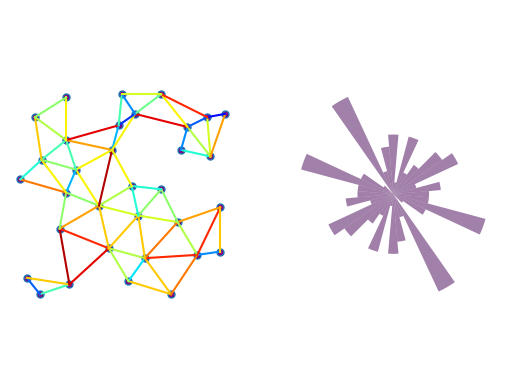

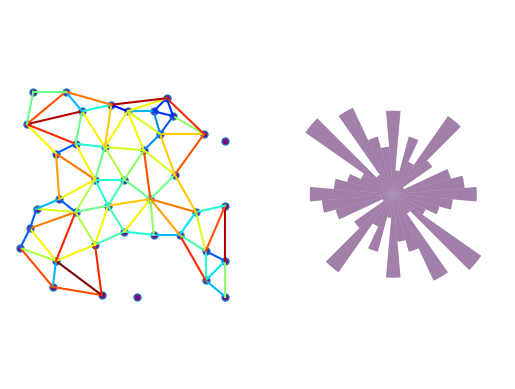

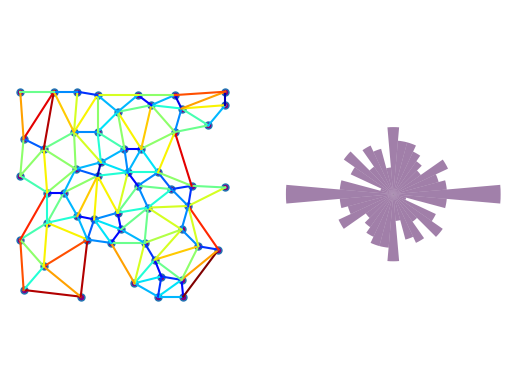

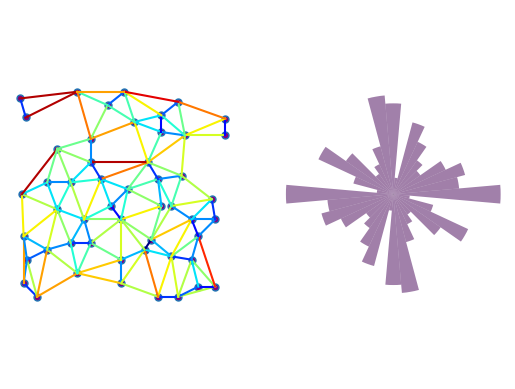

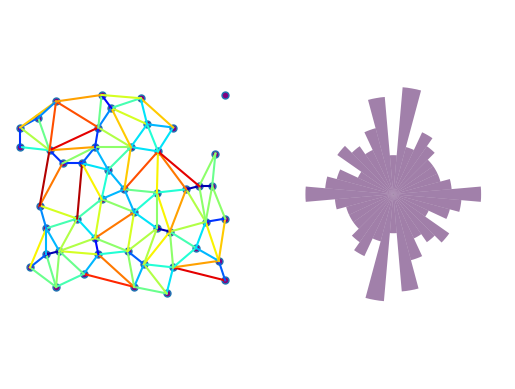

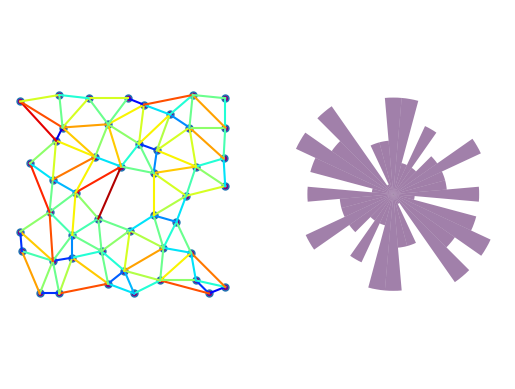

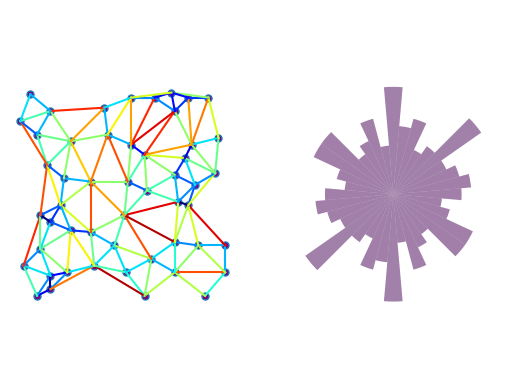

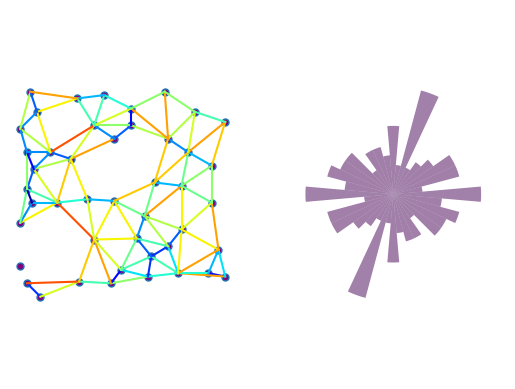

In [12]:
test=glob.glob("../data/rendered/soma/2D/*.npy")
for i in range(8):
    vxs = readVXSfromMat(np.load(test[i]))[0]
    links = generateLinks(vxs * 16, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure()
    ax = plt.subplot(121)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(122,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)